In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(context="paper", rc={
    "font.size": 10,
    "ps.useafm": True,
    "pdf.use14corefonts": True,
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage{sfmath}"
})

w = 3.487
h = w / 1.618

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `bandwidth_overhead-crop.pdf'.


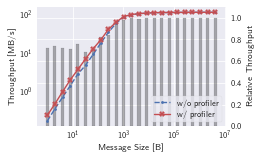

In [2]:
data = np.loadtxt("liboxton_bandwidth.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Throughput [MB/s]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o profiler")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ profiler")
ax2.legend(frameon=True, loc="lower right")
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("Relative Throughput")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.1))
ax1.set_xlabel("Message Size [B]")

width = 6e-2
x = data[:,0]
y = data[:,2] / data[:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3, zorder=10)

fig.set_size_inches(w, h)
fig.savefig("bandwidth_overhead.pdf")

!pdfcrop bandwidth_overhead.pdf
!mv bandwidth_overhead-crop.pdf bandwidth_overhead.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `latency_overhead-crop.pdf'.


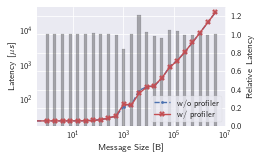

In [3]:
data = np.loadtxt("liboxton_latency.csv", delimiter=",", skiprows=1)

fig, ax1 = plt.subplots()
fig.subplots_adjust(left=.13, bottom=.20, right=.88, top=.97)
ax2 = ax1.twinx()

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.set_ylabel("Latency [$\mu s$]")
ax2.set_xscale("log")
ax2.set_yscale("log")

pal = sns.color_palette()

ax2.plot(data[:,0], data[:,2], color=pal[0], ls="--", marker=".", label="w/o profiler")
ax2.plot(data[:,0], data[:,1], color=pal[2], marker="X", label="w/ profiler")
ax2.legend(frameon=True, loc="lower right")
ax2.grid(False)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_xlabel("Message Size [B]")
ax1.set_ylabel("Relative Latency")
ax1.set_yscale("linear")
ax1.set_ylim((0,1.3))

width = 6e-2
x = data[1:,0]
y = data[1:,2] / data[1:,1]

for i in range(len(x)):
    ax1.fill([10**(np.log10(x[i])-width), 10**(np.log10(x[i])-width), 10**(np.log10(x[i])+width), 10**(np.log10(x[i])+width)],
                 [0, y[i], y[i], 0],
                 color="k", alpha=0.3)
    
fig.set_size_inches(w, h)
fig.savefig("latency_overhead.pdf")

!pdfcrop latency_overhead.pdf
!mv latency_overhead-crop.pdf latency_overhead.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nas_cg_execution_time-crop.pdf'.


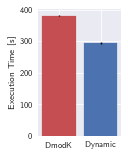

In [4]:
pal = sns.color_palette()

data = np.loadtxt("nas_cg_time.csv", delimiter=",", skiprows=1)
data = data.transpose()[1:]
avgs = np.average(data, axis=1)
errs = np.std(data, axis=1)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.27, bottom=.15, right=.97, top=.97)
bars = ax.bar(np.arange(avgs.size), avgs, tick_label=["DmodK", "Dynamic"], yerr=errs)
bars[0].set_color(pal[2])
bars[1].set_color(pal[0])
ax.set_ylabel("Execution Time [s]")

fig.set_size_inches(w / 2 - 0.1, h)
fig.savefig("nas_cg_execution_time.pdf")

!pdfcrop nas_cg_execution_time.pdf
!mv nas_cg_execution_time-crop.pdf nas_cg_execution_time.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nersc_milc_execution_time-crop.pdf'.


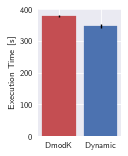

In [5]:
data = np.loadtxt("nersc_milc_time.csv", delimiter=",", skiprows=1)
data = data.transpose()[1:]
avgs = np.average(data, axis=1)
errs = np.std(data, axis=1)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.27, bottom=.15, right=.97, top=.97)
bars = ax.bar(np.arange(avgs.size), avgs, tick_label=["DmodK", "Dynamic"], yerr=errs)
bars[0].set_color(pal[2])
bars[1].set_color(pal[0])
ax.set_ylabel("Execution Time [s]")

fig.set_size_inches(w / 2 - 0.1, h)
fig.savefig("nersc_milc_execution_time.pdf")

!pdfcrop nersc_milc_execution_time.pdf
!mv nersc_milc_execution_time-crop.pdf nersc_milc_execution_time.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nas_cg_congestion-crop.pdf'.


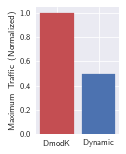

In [6]:
pal = sns.color_palette()

x = np.arange(2)
y= np.array([1, 0.500022154])

fig, ax = plt.subplots()
fig.subplots_adjust(left=.27, bottom=.15, right=.97, top=.97)
bars = ax.bar(x, y, tick_label=["DmodK", "Dynamic"])
bars[0].set_color(pal[2])
bars[1].set_color(pal[0])
ax.set_ylabel("Maximum Traffic (Normalized)")

fig.set_size_inches(w / 2 - 0.1, h)
fig.savefig("nas_cg_congestion.pdf")

!pdfcrop nas_cg_congestion.pdf
!mv nas_cg_congestion-crop.pdf nas_cg_congestion.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nersc_milc_congestion-crop.pdf'.


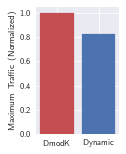

In [7]:
pal = sns.color_palette()

x = np.arange(2)
y= np.array([1, 0.824892101])

fig, ax = plt.subplots()
fig.subplots_adjust(left=.27, bottom=.15, right=.97, top=.97)
bars = ax.bar(x, y, tick_label=["DmodK", "Dynamic"])
bars[0].set_color(pal[2])
bars[1].set_color(pal[0])
ax.set_ylabel("Maximum Traffic (Normalized)")

fig.set_size_inches(w / 2 - 0.1, h)
fig.savefig("nersc_milc_congestion.pdf")

!pdfcrop nersc_milc_congestion.pdf
!mv nersc_milc_congestion-crop.pdf nersc_milc_congestion.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nas_cg_multi_congestion-crop.pdf'.


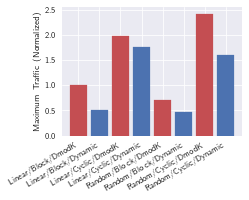

In [8]:
pal = sns.color_palette()

y = np.array([1,
                        0.500022154,
                        1.975045414,
                        1.750011088,
                        0.703004215,
                        0.46086997,
                        2.420460534,
                        1.590722326])
x = np.arange(y.size)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.25, bottom=.3, right=.97, top=.97)

bars = ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(["Linear/Block/DmodK",
                                  "Linear/Block/Dynamic",
                                  "Linear/Cyclic/DmodK",
                                  "Linear/Cyclic/Dynamic",
                                  "Random/Block/DmodK",
                                  "Random/Block/Dynamic",
                                  "Random/Cyclic/DmodK",
                                  "Random/Cyclic/Dynamic"],
                                 rotation=30, ha="right")

for i, bar in enumerate(bars):
    if i % 2 == 0:
        bar.set_color(pal[2])
    else:
        bar.set_color(pal[0])
        
ax.set_ylabel("Maximum Traffic (Normalized)")
        
fig.set_size_inches(w, h+.5)
fig.savefig("nas_cg_multi_congestion.pdf")

!pdfcrop nas_cg_multi_congestion.pdf
!mv nas_cg_multi_congestion-crop.pdf nas_cg_multi_congestion.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `nersc_milc_multi_congestion-crop.pdf'.


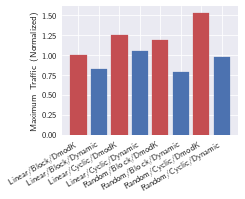

In [9]:
pal = sns.color_palette()

y = np.array([1,
                        0.824892101,
                        1.249268351,
                        1.054598915,
                        1.19256909,
                        0.784385877,
                        1.536461727,
                        0.976017107])
x = np.arange(y.size)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.27, bottom=.3, right=.97, top=.97)

bars = ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(["Linear/Block/DmodK",
                                  "Linear/Block/Dynamic",
                                  "Linear/Cyclic/DmodK",
                                  "Linear/Cyclic/Dynamic",
                                  "Random/Block/DmodK",
                                  "Random/Block/Dynamic",
                                  "Random/Cyclic/DmodK",
                                  "Random/Cyclic/Dynamic"],
                                 rotation=30, ha="right")

for i, bar in enumerate(bars):
    if i % 2 == 0:
        bar.set_color(pal[2])
    else:
        bar.set_color(pal[0])
        
ax.set_ylabel("Maximum Traffic (Normalized)")
        
fig.set_size_inches(w, h+.5)
fig.savefig("nersc_milc_multi_congestion.pdf")

!pdfcrop nersc_milc_multi_congestion.pdf
!mv nersc_milc_multi_congestion-crop.pdf nersc_milc_multi_congestion.pdf